## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is predicting a continious or numeric outcome, classification is like predicting a categorical outcome.
2. confusion table is a cross tabulates of predicted vs actual class labels. It help us find out true positive and negatives, false positive and negative. We cna see which class is confused with each other. 
3. SSE measures the total prediction error, so lower means it is closer to the actual value.
4. overfitting is model is too complex, fit data training noise but don't do well on new data. Underfitting is that the model is too simple, it misses pattern and perform bad on both training and test data. 
5. Splitting data helps since we are simulating how the model will perform on future unseen data. 
6. Class Label: simple, easy to intepret but loses information about uncertainty.
Probability distribution: Shows confidence levels, allows custom thresholds and better for risky decisions. It's a little more complex to intepret however. 

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
#2.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]
print("NA values:\n", df.isna().sum())
print("\nShape:", df.shape)
print("\nHead:\n", df.head())

NA values:
 price      0
year       0
mileage    0
dtype: int64

Shape: (2499, 3)

Head:
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


In [5]:
#2.2
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

X = df[['year', 'mileage']].apply(maxmin)
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=65) 

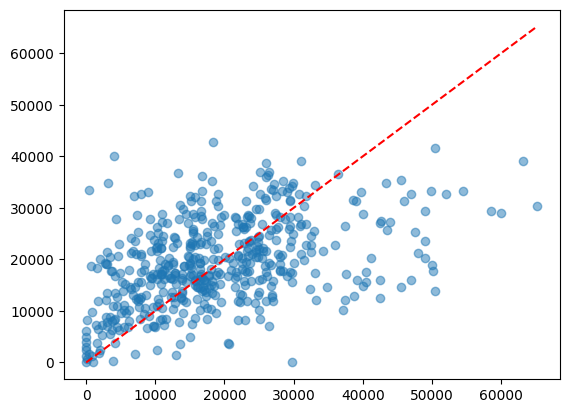

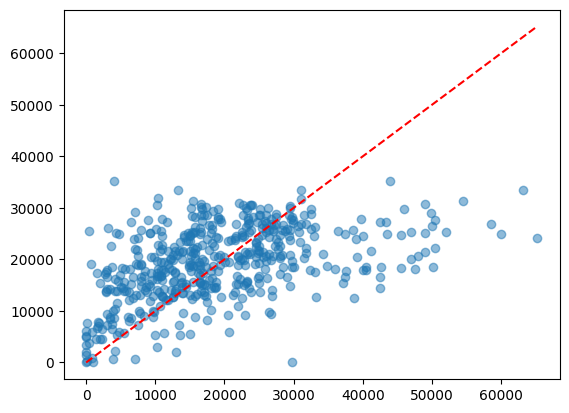

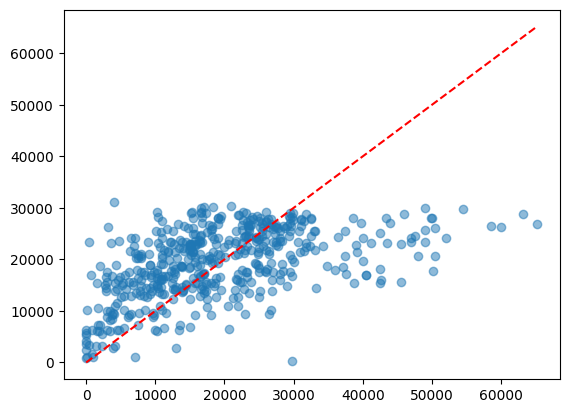

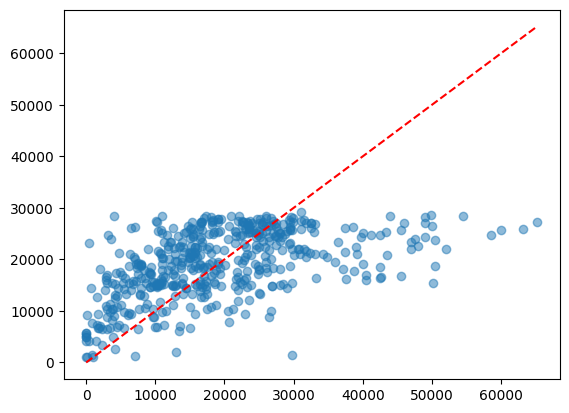

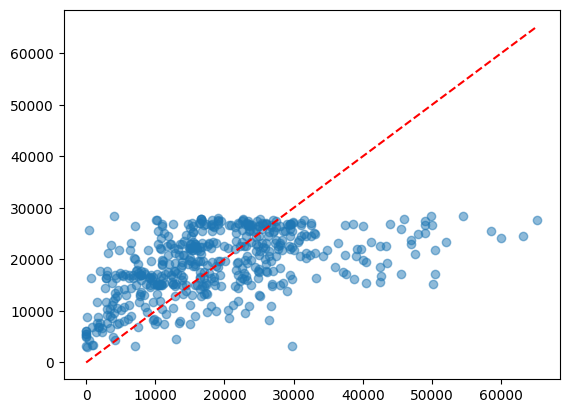

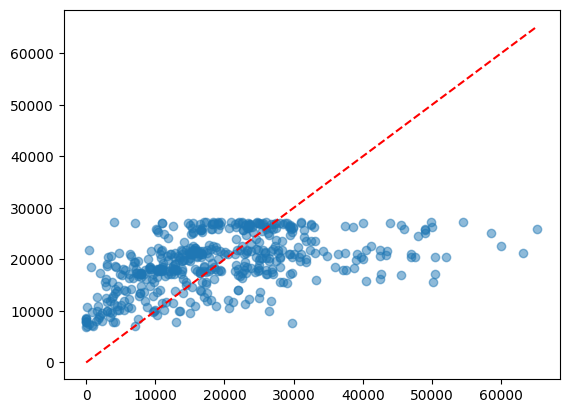

the optimal k is
[4]


In [ ]:
#2.4 and 2.5
k_values = [3, 10, 25, 50, 100, 300]
SSE = [] 
SSE_on_train = [] 

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k+1) 
    fitted_model = model.fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test) 
    SSE.append(np.sum( (y_test-y_hat)**2 ))
    plt.scatter(y_test, y_hat, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()
    y_hat = fitted_model.predict(X_train) 
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) 
    

SSE_min = np.min(SSE) 
min_index = np.where(SSE==SSE_min) 
k_star = min_index[0]+1
print("the optimal k is")
print(k_star)

As K increase, prediction become a little more concentrated near the diagonal line, optimal k is 50. 

We can say that earlier value of k, we see more overfitting because prediction were more scattered, as K increase, it underfits because there is less variance

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [24]:
df = pd.read_csv('../data/zoo.csv')

for c in sorted(df['class'].unique()):
    animals = df[df['class'] == c]['animal'].tolist()
    print(f"Class {c}: {animals}\n")


Class 1: ['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']

Class 2: ['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']

Class 3: ['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']

Class 4: ['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']

Class 5: ['frog', 'frog', 'newt', 'toad']

Class 6: ['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp']

Class 7: ['clam', 'crab', 'crayfish', 'l

In [25]:
#had to look this part up
print("Class sizes:\n", df['class'].value_counts().sort_index())

features = df.columns.drop(['animal', 'class'])
print("\nFeature means:\n", df[features].mean())

Class sizes:
 class
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64

Feature means:
 hair        0.425743
feathers    0.198020
eggs        0.584158
milk        0.405941
airborne    0.237624
aquatic     0.356436
predator    0.554455
toothed     0.603960
backbone    0.821782
breathes    0.792079
venomous    0.079208
fins        0.168317
legs        2.841584
tail        0.742574
domestic    0.128713
catsize     0.435644
dtype: float64


In [26]:
#3.2
X = df.drop(['animal', 'class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
#3.3
SSE = [] 
SSE_on_train = [] 


for k in range(50):
    model = KNeighborsClassifier(n_neighbors=k+1) 
    fitted_model = model.fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum( (y_test-y_hat)**2 )) 
    y_hat = fitted_model.predict(X_train)
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) 

SSE_min = np.min(SSE) 
min_index = np.where(SSE==SSE_min) 
k_star = min_index[0]+1 
print("this is the optimal k")
print(k_star)


this is the optimal k
[1]


I picked the optimal k based on the lowest sse

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
#3.4
model = KNeighborsClassifier(n_neighbors=k_star[0])
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted']))
print(classification_report(y_test, y_hat))

Predicted   1  2  3  4  5  6  7
Actual                         
1          24  0  0  0  0  0  0
2           0  6  0  0  0  0  0
3           0  0  1  1  1  0  0
4           0  0  0  5  0  0  0
5           0  0  0  0  3  0  0
6           0  0  0  0  0  5  0
7           0  0  0  0  0  1  4
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00         6
           3       1.00      0.33      0.50         3
           4       0.83      1.00      0.91         5
           5       0.75      1.00      0.86         3
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5

    accuracy                           0.94        51
   macro avg       0.92      0.88      0.87        51
weighted avg       0.95      0.94      0.93        51



acurracy was 94, mistake seems to be made for group that are super similar to each other and hard to distinguish.

In [33]:
#3.5
X_reduced = df[['milk', 'aquatic', 'airborne']]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.5, random_state=42)
model_r = KNeighborsClassifier(n_neighbors=k_star[0])
model_r.fit(X_train_r, y_train_r)
y_hat_r = model_r.predict(X_test_r)
print(pd.crosstab(y_test_r, y_hat_r, rownames=['Actual'], colnames=['Predicted']))
print(classification_report(y_test_r, y_hat_r))

Predicted   1  2  4  7
Actual                
1          24  0  0  0
2           0  6  0  0
3           0  0  1  2
4           0  0  5  0
5           0  0  3  0
6           0  5  0  0
7           0  0  3  2
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.55      1.00      0.71         6
           3       0.00      0.00      0.00         3
           4       0.42      1.00      0.59         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.50      0.40      0.44         5

    accuracy                           0.73        51
   macro avg       0.35      0.49      0.39        51
weighted avg       0.62      0.73      0.65        51



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


acurracy is a little lower, 356 is not represented, since these are not represented, the accuracy drops to 73%, those class seems to depend on the trait of milk, aquatic, and airborne the most. 

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:

def kde_plot(data, kernel='gaussian', bandwidth=None):
    data = np.array(data).flatten()
    n = len(data)
    
    #default bandwidth should be the silverman plugin, but allow user to specify
    if bandwidth is None: #went with the standard formula too
        std = np.std(data, ddof=1)
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        bandwidth = 0.9 * min(std, iqr / 1.34) * (n ** (-1/5))
    
    #standard grid range is 3 or 4 times, i went with 3
    x_min, x_max = data.min() - 3*bandwidth, data.max() + 3*bandwidth
    x_grid = np.linspace(x_min, x_max, 200) #i just chose 200 points
    

    z = (x_grid.reshape(-1, 1) - data.reshape(1, -1)) / bandwidth
    
    # Kernel functions
    if kernel == 'gaussian':
        k_values = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)
    elif kernel == 'uniform':
        k_values = np.where(np.abs(z) <= 1, 0.5, 0)
    elif kernel == 'epanechnikov':
        k_values = np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0)
    else:
        raise ValueError("kernel must be 'gaussian', 'uniform', or 'epanechnikov'")
    
    # Average over all data points and normalize
    density = k_values.mean(axis=1) / bandwidth
    
    # Plot
    plt.plot(x_grid, density, label=f'Custom KDE ({kernel})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate (h={bandwidth:.3f})')
    
    return x_grid, density

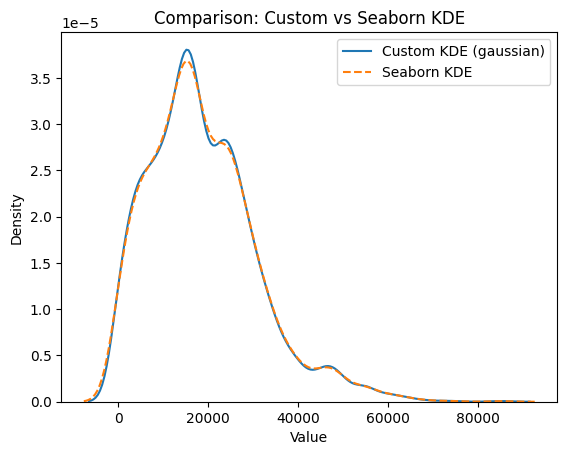

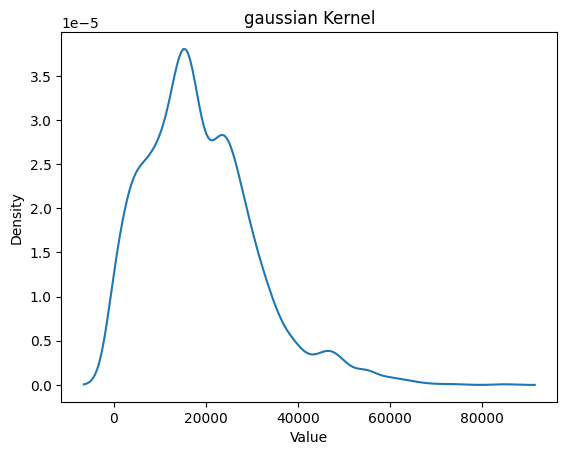

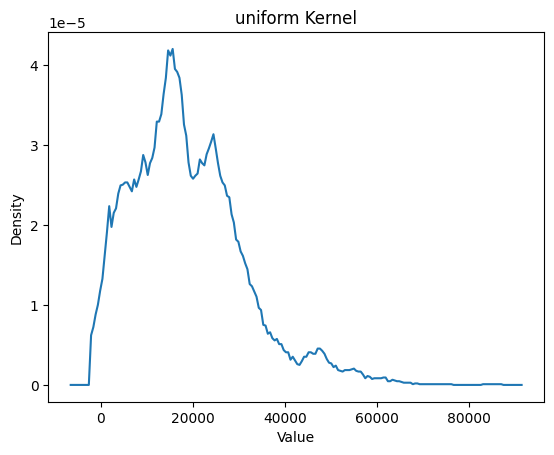

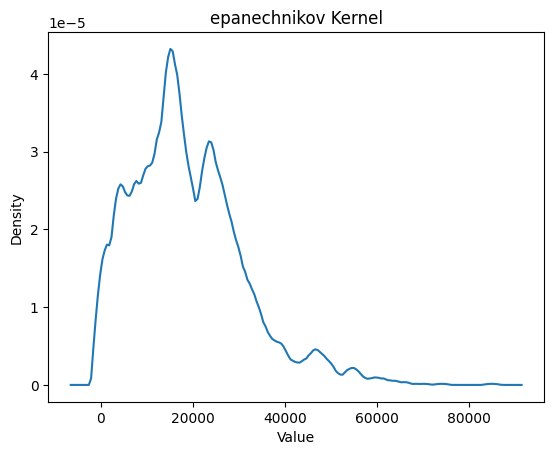

In [42]:
import seaborn as sns
df = pd.read_csv('../data/USA_cars_datasets.csv')
prices = df['price']

kde_plot(prices, kernel='gaussian')
sns.kdeplot(prices, label='Seaborn KDE', linestyle='--')
plt.legend()
plt.title('Comparison: Custom vs Seaborn KDE')
plt.show()


for kernel in ['gaussian', 'uniform', 'epanechnikov']:
    kde_plot(prices, kernel=kernel)
    plt.title(f'{kernel} Kernel')
    plt.show()